![](https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/LinePurplePink.jpg?raw=true)

# <center>Subject Area</center>



---


### This data set includes various data on students, for example:
- Secondary and higher secondary school percentage and specialization
- Degree specialization
- Type and Work experience

### and many other parameters that we need to analyze to correctly predict student status

# <center>Task Type</center>


### After we have defined and analyzed the subject area, it is necessary to understand what type of problem we solve and choose appropriate metrics


---


### **Task**: Classification (binary)
### **Assumed Metrics**: LogLoss, Accuracy, ROC-AUC, Presicion, Recall, F1-Score

#### Work with data and analysis

In [75]:
import os
import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats
from scipy.stats import norm

pd.options.mode.chained_assignment = None

#### Visualization

In [76]:
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
sns.set()
style.use('fivethirtyeight')

#### Work with ML

In [77]:
from sklearn import metrics
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

#### Work with DL

In [78]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

# Loading and Checking Dataset


In [79]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [80]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [81]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[0],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600},
                title = {"text": "Rows 🗒 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0.7, 1], 'x': [0, 0.5]}))

fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[1],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600, "valueformat": ".0f"},
                title = {"text": "Columns 🏛 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0, 0.3], 'x': [0.5, 1]}))
fig.show()

### It’s worth noting that we don’t have much data

In [82]:
data.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [83]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [84]:
data.status.unique()

array(['Placed', 'Not Placed'], dtype=object)

In [85]:
hfont = {'fontname':'serif', 'weight': 'bold'}
two_colors = ['#dd38ff', '#5727ed']
five_colors = ['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE']

# Missing Values

In [86]:
mis_val_colors = []

for col in data.columns:
    if data[col].isna().sum() != 0:
        mis_val_colors.append('#fe1969')
    else:
        mis_val_colors.append('gray')

Text(0.5, 1.15, 'Missing values (before)')

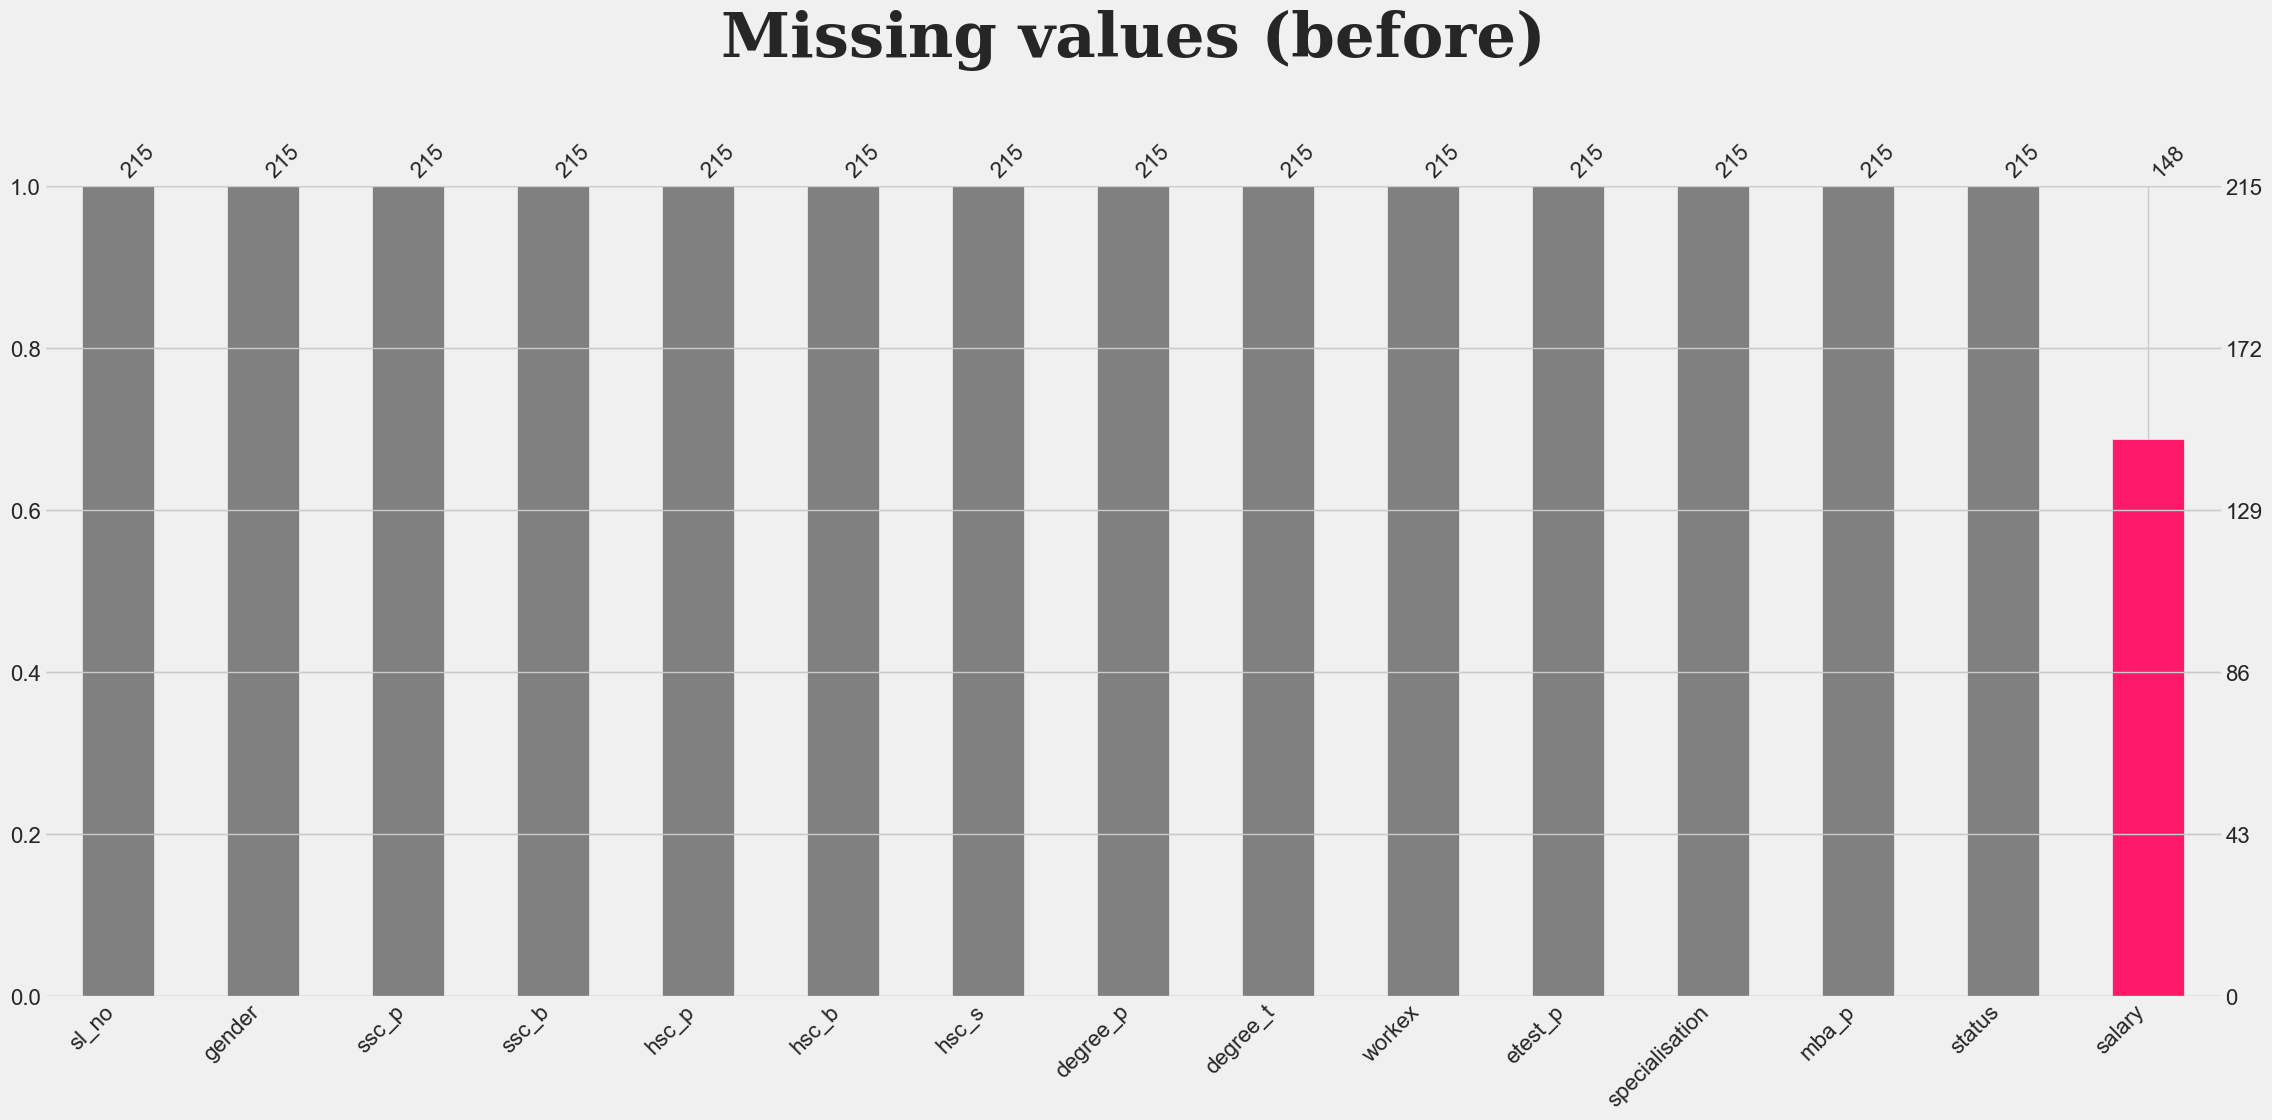

In [87]:
msn.bar(data, color=mis_val_colors)
plt.title('Missing values (before)', size=45, y=1.15, **hfont)

This dataset has some missing values for salary column

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

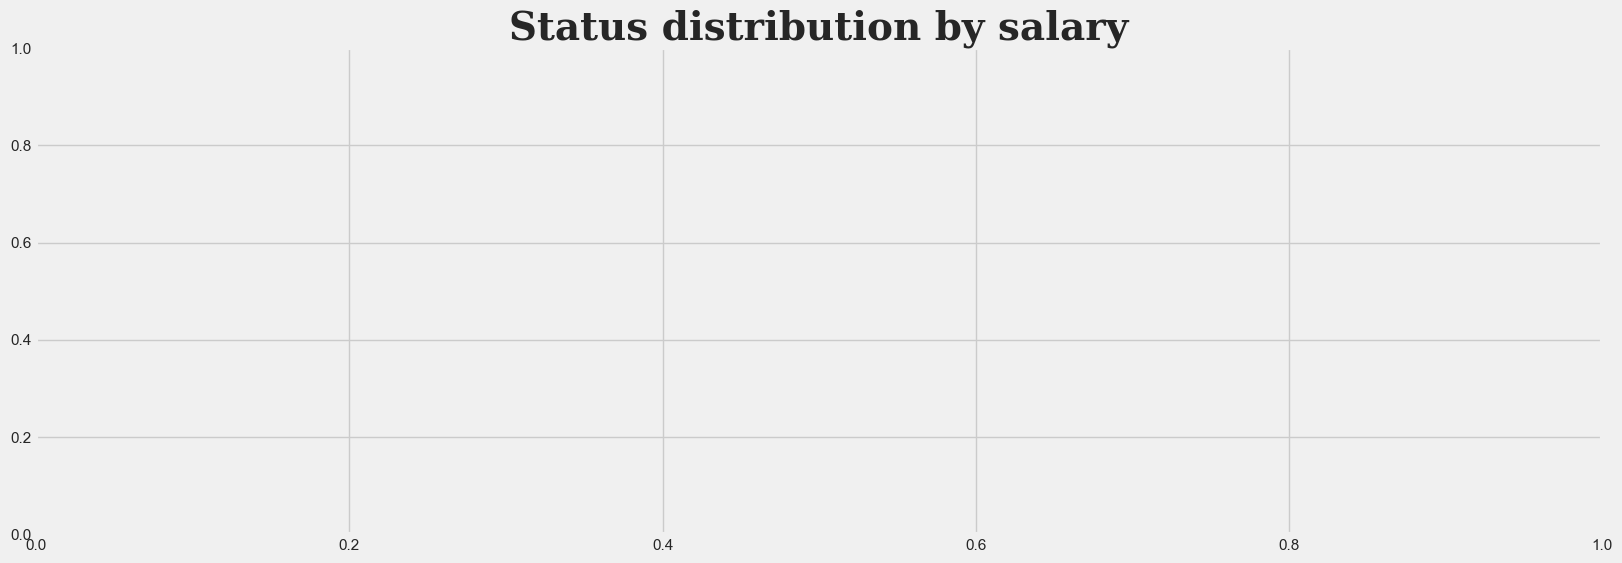

In [91]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by salary', size=28, **hfont)

# Data without NaN values in salary column
temp_data = data.copy()
temp_data = temp_data.dropna()

# Main plots
sns.kdeplot(data=temp_data,x='salary', shade=True, ax=ax, color=two_colors[0], alpha=1)
plt.xlabel('salary', **hfont)
plt.ylabel('density', **hfont)

#### We have **Right Skewed** distribution. It’s worth noting that we don’t have much data

In [ ]:
temp_data.salary.mode().iloc[0]

#### But if we look at the status of students whose **salary is missing**, it becomes clear that they simply do not have a salary, because **they do not work**

In [ ]:
data[['status', 'salary']][np.isnan(data.salary)]

#### In this case, we can replace the missing values with a variable of **"0"**, but then we will have a direct link with the predicted status, so you should **delete this column**

In [ ]:
# Let's look at correlation b/w salary and status
data.salary.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize = (18, 4))

status_salary_plot = sns.scatterplot(x = 'salary', y = 'status', data = data,
                                     s=250, color=two_colors[0])

ax.xaxis.set_ticks(ax.get_xticks())
ax.yaxis.set_ticks(ax.get_yticks())

status_salary_plot.set_yticklabels(['Not Placed', 'Placed'], size=30, **hfont)
status_salary_plot.set(ylabel=None)

plt.title('Status by salary', size=38, y=1.15, **hfont)
plt.xlabel('Salary', size=30, **hfont)
plt.legend()

In [ ]:
data = data.drop(columns=['salary'])

# Distribution of predicted values in the dataset


In [ ]:
pie_colors = two_colors.copy()

pred_classes = data.status.value_counts()

plt.figure(figsize=(17, 12))
patches, texts, pcts = plt.pie(pred_classes,
                               labels=['Yes', 'No'],
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 30,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white', size=30)

plt.title('Is hired ?', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### Conclusions on class ratios:
#### We have a **preponderance** of observations in one class. In our data, the number of students hired to work is much higher. Therefore, the use of the **Accuracy** metric may lead to sub-optimal results

# EDA + FE: Exploratory Data Analysis + Feature Engineering


In [ ]:
data.head(3)

In [ ]:
data.status = data.status.map({'Placed': 1, 'Not Placed': 0})

## Serial Number


---


This property is not necessary when building a model because it has no relationship with the predicted variable. Let’s delete it

In [ ]:
data.drop(columns=['sl_no'], inplace=True)

## Gender


---


Gender: Male='M',Female='F'

In [ ]:
type(data.gender.iloc[0])

In [ ]:
data.gender = data.gender.map({'M': 1, 'F': 0})

In [ ]:
plt.figure(figsize=(12, 8))
gender_plot = sns.countplot(y=data.gender, palette=two_colors)
gender_plot.set_title('Student population by gender', fontsize=35, y=1.05, **hfont)
gender_plot.set(ylabel=None)
plt.grid(False)
gender_plot.set_yticklabels(['F', 'M'], size=25, **hfont)
gender_plot.set_xlabel('count', size=20, **hfont)

In [ ]:
gender_plot = sns.catplot(y='status', x='gender', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors)
gender_plot.set_xticklabels(['Female', 'Male'], size=30, **hfont)
gender_plot.fig.suptitle('Gender Influence on Status',
                            size=45, y=1.05, **hfont)
gender_plot.set(xlabel=None, ylabel=None)

### **Conclusion:** Male students slightly more often hired

## SSC_P


---

Secondary Education percentage - 10th Grade

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by SSC_P', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': two_colors[0]},
                             alpha=0.9)

ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif',
                                'size': '20',
                                'weight': 'bold',
                                'color': two_colors[1]}, alpha=0.9)

sns.kdeplot(data=data[data.status == 1],
            x='ssc_p', shade=True, ax=ax, color=two_colors[0], alpha=1)
sns.kdeplot(data=data[data.status == 0],
            x='ssc_p', shade=True, ax=ax, color=two_colors[1], alpha=0.7)
plt.xlabel('SSC_P', **hfont)

### Let's find out how different this groups via **statistical tests**

In [ ]:
placed_group = data[data.status == 1]['ssc_p']
not_placed_group = data[data.status == 0]['ssc_p']

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

In [ ]:
print(f'Results of T-test                :   {t_test.pvalue}')
print(f'Results of U-test (Mann-whitneyu):   {u_test.pvalue}')

### **Conclusion:** 
- Visually looks like on average, the higher a 10th grade, the higher the chance to get a job
- We also ran tests and found statistically significant differences between groups

## SSC_B:


---


Board of Education: Central / Others (10th)

In [ ]:
data.ssc_b.value_counts()

In [ ]:
data.ssc_b = data.ssc_b.map({'Central': 1, 'Others': 0})

In [ ]:
plt.figure(figsize=(12, 8))
ssc_b_plot = sns.countplot(x=data.ssc_b,
                            palette=two_colors[::-1])
ssc_b_plot.set_title('Count of ssb: Board of Education (10th)',
                      fontsize=30, y=1.05, **hfont)
ssc_b_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
ssc_b_plot.set_xticklabels(['Others', 'Central'], size=25, **hfont)

In [ ]:
ssc_b_plot = sns.catplot(x='status', y='ssc_b', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
ssc_b_plot.set_xticklabels(['Others', 'Central'], size=30, **hfont)
ssc_b_plot.fig.suptitle('ssc_b Influence on Status',
                            size=45, y=1.05, **hfont)
ssc_b_plot.set(xlabel=None, ylabel=None)

## HSC_P


---

Higher Secondary Education percentage- 12th Grade

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Status distribution by Higher Secondary Education percentage', size=25, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': two_colors[0]}, alpha=0.9)

ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif',
                                'size': '20',
                                'weight': 'bold',
                                'color': two_colors[1]}, alpha=0.9)

sns.kdeplot(data=data[data.status == 1],
            x='hsc_p', shade=True, ax=ax, color=two_colors[0], alpha=1)
sns.kdeplot(data=data[data.status == 0],
            x='hsc_p', shade=True, ax=ax, color=two_colors[1], alpha=0.7)
plt.xlabel('HSC_P', **hfont)

print(f'Placed mean:       {data[data.status == 1]["hsc_p"].mean()}')
print(f'Not Placed mean:   {data[data.status == 0]["hsc_p"].mean()}')

### Let's find out how different this groups via **bootstrap** test


---


#### We have data with a very similar distribution to normal, but in our case we do not have very much data, so t-test may give not quite correct result

In [ ]:
from tqdm.auto import tqdm

def get_bootstrap(
    data_column_1, # numeric values for group 1
    data_column_2, # numeric values for group 2
    boot_it = 1000, # bootstrap samples
    statistic = np.mean, # the statistic
    bootstrap_conf_level = 0.95 # significance threshold 
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # get samples
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len,
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Visualization
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [ ]:
hsc_p_test = get_bootstrap(data[data.status == 1]["hsc_p"], data[data.status == 0]["hsc_p"])

In [ ]:
print(f'P value for this test: {hsc_p_test["p_value"]}')

### **Conclusion:** 
- Visually looks like there is no difference b/w the groups (both datasets from the same distribution) 
- But when we ran bootstrap-test we found statistically significant differences between groups

## HSC_B:


---


Board of Education: Central / Others (12th)

In [ ]:
data.hsc_b = data.hsc_b.map({'Central': 1, 'Others': 0})

In [ ]:
plt.figure(figsize=(12, 8))
ssc_b_plot = sns.countplot(x=data.hsc_b,
                            palette=two_colors[::-1])
ssc_b_plot.set_title('Count of hsc_b: Board of Education (12th)',
                      fontsize=30, y=1.05, **hfont)
ssc_b_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
ssc_b_plot.set_xticklabels(['Others', 'Central'], size=25, **hfont)

### **Conclusion:** There are not many students who have completed the 12th grade in central schools

In [ ]:
hsc_b_plot = sns.catplot(x='status', y='hsc_b', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
hsc_b_plot.set_xticklabels(['Others', 'Central'], size=30, **hfont)
hsc_b_plot.fig.suptitle('hsc_b Influence on Status',
                            size=45, y=1.05, **hfont)
hsc_b_plot.set(xlabel=None, ylabel=None)

## HSC_S:


---


Specialization in Higher Secondary Education

In [ ]:
data.hsc_s = data.hsc_s.map({'Commerce': 2, 'Science': 1, 'Arts': 0}) 

In [ ]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
hsc_s_plot = sns.countplot(x=data.hsc_s, ax=ax1, palette=five_colors)
hsc_s_plot.set_title('Specialization count plot &'
                         ' influence on status',
                         fontsize=35, y=1.05, **hfont)
hsc_s_plot.set(xlabel=None,
                   ylabel=None)
hsc_s_plot.set_xticklabels(['Arts', 'Science', 'Commerce'],
                                size=18, **hfont)


ax2 = fig.add_subplot(grid[1, :])
hsc_s_cat = sns.pointplot(x=data.hsc_s, y='status', data=data,
             ax=ax2, palette=five_colors)
hsc_s_cat.set(xlabel=None,
                   ylabel=None)
hsc_s_cat.set_xticklabels([])

### **Conclusion:** 
#### People with a specialization in higher secondary education - art, have a lower chance of finding a work

## degree_p


---


Degree Percentage

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by degree %', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.04

ax.text(90, height, 'Placed', {'fontproperties': 'Serif',
                              'size': '24',
                              'weight': 'bold',
                              'color': two_colors[0]}, alpha=0.9)

ax.text(89, height, '|', {'fontproperties': 'Serif',
                         'size': '24',
                         'weight': 'bold',
                         'color': 'black'}, alpha=0.9)

ax.text(80.5, height, 'Not Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.degree_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.degree_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('Degree %', size=20, **hfont)

print(f'Placed mean:       {data[data.status == 1]["degree_p"].mean()}')
print(f'Not Placed mean:   {data[data.status == 0]["degree_p"].mean()}')

In [ ]:
placed_group = data[data.status == 1]['degree_p']
not_placed_group = data[data.status == 0]['degree_p']

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

In [ ]:
print(f'Results of T-test                :   {t_test.pvalue}')
print(f'Results of U-test (Mann-whitneyu):   {u_test.pvalue}')

### **Conculsion:**

There is a statistical difference between groups divided by degree percentage

## degree_t


---


Under Graduation(Degree type)- Field of degree education

In [ ]:
plt.figure(figsize=(12, 6))
degree_t_plot = sns.countplot(x=data.degree_t, palette=two_colors[::-1])
degree_t_plot.set_title('Countplot of degree_t',
                      fontsize=30, y=1.05, **hfont)
degree_t_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
degree_t_plot.set_xticklabels(data.degree_t.unique(), size=25, **hfont)

In [ ]:
fig = plt.figure(figsize=(12, 6))

degree_type_plot = sns.pointplot(x=data.degree_t, y='status', data=data, palette=five_colors)

degree_type_plot.set_title('Degree Type influence on status', fontsize=30, y=1.05, **hfont)
degree_type_plot.set(xlabel=None,
                     ylabel=None)
degree_type_plot.set_xticklabels(data.degree_t.unique(), size=25, **hfont)

In [ ]:
data.degree_t.unique()

#### Encoding by degree of influence on status

In [ ]:
data.degree_t = data.degree_t.map({'Sci&Tech': 1, 'Comm&Mgmt': 2, 'Others': 3}) 

## Workex


---


Work experience 

In [ ]:
workex_data = data.workex.value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(workex_data,
                               labels=workex_data.index,
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Work Experience', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [ ]:
workex_plot = sns.catplot(x='status', y='hsc_b', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
workex_plot.set_xticklabels(['Others', 'Central'], size=30, **hfont)
workex_plot.fig.suptitle('hsc_b Influence on Status', size=45, y=1.05, **hfont)
workex_plot.set(xlabel=None, ylabel=None)

In [ ]:
data.workex = data.workex.map({'No': 0, 'Yes': 1})

## etest_p


---


Employability test percentage (conducted by college)

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by emp-test', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.025

ax.text(96, height, 'Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[0]}, alpha=0.9)

ax.text(94, height, '|', {'fontproperties': 'Serif',
                          'size': '24',
                          'weight': 'bold',
                          'color': 'black'}, alpha=0.9)

ax.text(81.5, height, 'Not Placed', {'fontproperties': 'Serif',
                                     'size': '24',
                                     'weight': 'bold',
                                     'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.etest_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.etest_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('test results', size=20, **hfont)

In [ ]:
data.status.value_counts()

In [ ]:
placed_group = data[data.status == 1]['etest_p']
not_placed_group = data[data.status == 0]['etest_p']

placed_group_for_wil = np.random.choice(placed_group, len(not_placed_group))

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

# If variance is different for b/w the groups
wilcoxon = stats.wilcoxon(placed_group_for_wil, not_placed_group)

print(f'P-value (alpha = 0.05)')
print('-'*7)
print(f'T-test  : {t_test.pvalue:.5f}')
print(f'U-test  : {u_test.pvalue:.5f}')
print(f'Wilcoxon: {wilcoxon.pvalue:.5f}')

### **Conculsion:**

This is a very interesting situation, as we have not received any significant differences, but p.value is close to the threshold, try further test our model with or without this variable

## specialisation

---

Post Graduation(MBA) - Specialization

In [ ]:
plt.figure(figsize=(12, 6))
specialisation_plot = sns.countplot(x=data.specialisation, palette=two_colors[::-1])
specialisation_plot.set_title('Countplot of specialisation',
                      fontsize=30, y=1.05, **hfont)
specialisation_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
specialisation_plot.set_xticklabels(data.specialisation.unique(), size=25, **hfont)

In [ ]:
spec_catplot = sns.catplot(x='status', y='specialisation', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
spec_catplot.set_yticklabels(['Mrt&HR', 'Mrt&Fin'], size=30, **hfont)
spec_catplot.fig.suptitle('Specialisation Influence on Status', size=45, y=1.05, **hfont)
spec_catplot.set(xlabel=None, ylabel=None)

In [ ]:
data.specialisation = data.specialisation.map({'Mkt&Fin': 1, 'Mkt&HR': 0})

## mba_p

---

MBA percentage. A master of business administration (MBA) is a graduate degree that provides theoretical and practical training for business or investment management.

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title(f'Status distribution by MBA percentage', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)

height = 0.045

ax.text(71, height, 'Placed', {'fontproperties': 'Serif',
                               'size': '24',
                               'weight': 'bold',
                               'color': two_colors[0]}, alpha=0.9)

ax.text(48, height, 'Not Placed', {'fontproperties': 'Serif',
                                     'size': '24',
                                     'weight': 'bold',
                                     'color': two_colors[1]}, alpha=0.9)


sns.kdeplot(data.mba_p[data.status == 1], shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data.mba_p[data.status == 0], shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)

plt.xlabel('MBA %', size=20, **hfont)

In [ ]:
placed_group = data[data.status == 1]['mba_p']
not_placed_group = data[data.status == 0]['mba_p']

placed_group_for_wil = np.random.choice(placed_group, len(not_placed_group))

t_test = stats.ttest_ind(placed_group, not_placed_group)
u_test = stats.mannwhitneyu(placed_group, not_placed_group)

print(f'P-value (alpha = 0.05)')
print('-'*7)
print(f'T-test  : {t_test.pvalue:.5f}')
print(f'U-test  : {u_test.pvalue:.5f}')

### **Conculsion:**

We have not received any significant differences. Let's try further test our model without this feature (but we should be more careful, because this feature can be very helpful in finding patterns if it has a non-linear relationship to the target - for example, in combination with another feature)

## Heatmap

In [ ]:
plt.figure(figsize=(14, 10))

corr_mask = np.triu(data.corr())
h_map = sns.heatmap(data.corr(), mask=corr_mask, cmap='Blues')
h_map

# Data for Model
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/prepare.png?raw=true" width="100"/>

In [ ]:
data.head()

## Divide by X and y

In [ ]:
X = data.drop(['status'], axis=1)
y = data.status

print(X.shape, y.shape)

#### Try to drop feature etest_p (because p.value is close to the threshold)

In [ ]:
X = X.drop(columns=['etest_p'])

#### Dividing by train and test datasets will be performed in methods further

# Model


## Such models will be uncovered:


1. Classic ML (Machine learning) models
    1. Logistic Regression
    2. Random Forest Classifier
    3. Boosting Classifiers (XGBoost, AdaBoost)
2. Artificial Neural network

# Machine Learning models



In [ ]:
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score

models_results = [0]*5

def show_training_results(X, y, model_name, model, split_share=0.3, **kwargs):

    print(f'The model {model_name} with parameters : {kwargs}')
    m = model(**kwargs)

    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=split_share, random_state=rnd_state)

    m.fit(X_train, y_train)

    score = m.score(X_test, y_test)

    prediction = m.predict(X_test)
    pred_proba = m.predict_proba(X_test)

    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    F1 = f1_score(y_test, prediction)
    roc = roc_auc_score(y_test, pred_proba[:,1])

    all_metrics = np.array([score, precision, recall, F1, roc])

    print('-'*32)
    print(f'Score          ========>>> {score:.{3}f}')
    print()
    print(f'Precision      ========>>> {precision:.{3}f}')
    print()
    print(f'Recall         ========>>> {recall:.{3}f}')
    print()
    print(f'F1             ========>>> {F1:.{3}f}')
    print()
    print(f'ROC-AUC        ========>>> {roc:.{3}f}')

    plot_conf_mat(m, X_test, y_test)

    return all_metrics


def plot_conf_mat(model, X_test, y_test):

    y_pred = model.predict(X_test)

    pred_matrix = confusion_matrix(y_test, y_pred, normalize='true') * 100
    actual_matrix = confusion_matrix(y_test, y_pred, normalize='pred') * 100

    df_cm_true = pd.DataFrame(actual_matrix, index = ["Don't", 'Placed'],
                                columns = ["Don't", 'Placed'])
    
    df_cm_pred = pd.DataFrame(pred_matrix, index = ["Don't", 'Placed'],
                                columns = ["Don't", 'Placed'])

    fig, axis = plt.subplots(figsize=(16, 6), ncols=2)
    
    # Actual Values plot

    sns.heatmap(df_cm_true,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                ax=axis[0],
                annot_kws={"size": 20}).set_title('By Actual Values', fontsize = 20, **hfont)
    axis[0].set_xlabel('Actual values', fontsize = 15, **hfont)
    axis[0].set_ylabel('Predicted values', fontsize = 15, **hfont)

    # Prediction's Values plot

    pred_plot = sns.heatmap(df_cm_pred,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                ax=axis[1],
                annot_kws={"size": 20}).set_title('By Predicted Values', fontsize = 20, **hfont)
    axis[1].set_xlabel('Actual values', fontsize = 15, **hfont)
    axis[1].set_ylabel('Predicted values', fontsize = 15, **hfont)

    fig.subplots_adjust(top=0.8)
    fig.suptitle('Normilized Confusion Matrix in %', size=30, **hfont)

    plt.show()

# Logistic Regression


In [ ]:
rnd_state = 0

models_results[0] =   show_training_results(X, y,
                      'LogReg',
                      LogisticRegression,
                      max_iter=5000,
                      random_state=rnd_state)

# Random Forest


In [ ]:
models_results[1] =   show_training_results(X, y,
                      'RF',
                      RandomForestClassifier)

# AdaBoost


In [ ]:
models_results[2] =   show_training_results(X, y,
                      'AdaBoostClassifier',
                      AdaBoostClassifier)

# GradientBoostingClassifier

In [ ]:
models_results[3] =   show_training_results(X, y,
                      'GradientBoostingClassifier',
                      GradientBoostingClassifier)

# ANN (Artificial Neural Network)


In [ ]:
os.environ["KMP_SETTINGS"] = "false" # to avoid a huge warning about sort of settings

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [89]:
def neural_net_results(X, y):

    K.set_session(42)

    y = keras.utils.to_categorical(y, 2)

    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.25,
                                                      random_state=rnd_state)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = keras.Sequential([
        keras.layers.Flatten(input_dim=X_train.shape[1]),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(36, activation='relu'),
        keras.layers.Dense(36, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=[f1_m, precision_m, recall_m])

    history = model.fit(X_train, y_train,
              batch_size=100, epochs=150,
              validation_data=(X_val, y_val),
              verbose=0)

    score = loss, f1_score, precision, recall = model.evaluate(X_val, y_val, verbose=0)
    print(f'Neural Network score results    ========>>> {score}')

    history_plot(history)

    return score


def history_plot(history):

    fig = plt.figure(figsize=(12, 8))
    plt.title('Loss of ANN', size=35, **hfont)
    plt.plot(history.history['loss'], label="Train loss")
    plt.plot(history.history['val_loss'], label="Test loss")
    plt.legend()


def plot_nn_model(model):
    plot_model(model, show_shapes=True)

In [90]:
models_results[-1] = neural_net_results(X, y)

NameError: name 'X' is not defined

# Models Evaluating


### Aggregation of results into one dataset

---

### Using F1 Score & Recall as Metric

In [ ]:
models_results_recall = pd.DataFrame([el[2] for el in models_results], columns=['Result'])
models_results_recall['Model name'] = \
    ['Logistic Regression', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'ANN']
models_results_recall.sort_values(by=['Result'], inplace=True)

In [ ]:
models_results_F1 = pd.DataFrame([el[3] for el in models_results], columns=['Result'])
models_results_F1['Model name'] = \
    ['Logistic Regression', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'ANN']
models_results_F1.sort_values(by=['Result'], inplace=True)

In [ ]:
models_results_ROC = pd.DataFrame([el[-1] for el in models_results], columns=['Result'])
models_results_ROC['Model name'] = \
    ['Logistic Regression', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'ANN']
models_results_ROC.sort_values(by=['Result'], inplace=True)

### Accuracy plot for each model type

In [ ]:
# Recall
g = sns.catplot(x='Model name', y='Result', data=models_results_recall,
                height=6, aspect=3, kind='bar', legend=True, palette=five_colors)
g.fig.suptitle('Recall for each model', size=35, y=1.1, **hfont)
ax = g.facet_axis(0,0)
ax.tick_params(axis='x', which='major', labelsize=20)
for p in ax.patches:
    ax.text(p.get_x() + 0.27,
            p.get_height() * 1.02,
           '{0:.2f}%'.format(p.get_height()*100),
            color='black',
            rotation='horizontal',
            size='x-large', **hfont)
    
# F1 Score
g = sns.catplot(x='Model name', y='Result', data=models_results_F1,
                height=6, aspect=3, kind='bar', legend=True, palette=five_colors)
g.fig.suptitle('F1 for each model', size=35, y=1.1, **hfont)
ax = g.facet_axis(0,0)
ax.tick_params(axis='x', which='major', labelsize=20)
for p in ax.patches:
    ax.text(p.get_x() + 0.27,
            p.get_height() * 1.02,
           '{0:.2f}%'.format(p.get_height()*100),
            color='black',
            rotation='horizontal',
            size='x-large', **hfont)

# ROC-AUC
g = sns.catplot(x='Model name', y='Result', data=models_results_ROC,
                height=6, aspect=3, kind='bar', legend=True, palette=five_colors)
g.fig.suptitle('ROC-AUC for each model', size=35, y=1.1, **hfont)
ax = g.facet_axis(0,0)
ax.tick_params(axis='x', which='major', labelsize=20)
for p in ax.patches:
    ax.text(p.get_x() + 0.27,
            p.get_height() * 1.02,
           '{0:.2f}%'.format(p.get_height()*100),
            color='black',
            rotation='horizontal',
            size='x-large', **hfont)

# <center>Conclusions</center>



---

## Data analysis:
- In this work, we looked at some tools that can be used for EDA (Exploratory data analysis):
  - categorical plot
  - count plot
  - pie plot
- We used a special construction of a distribution diagram with text and special visualization
- Use of statistical methods to determine the level of significance for each variable (with several types of distributions)

## Application of models:
- Since, we have too small sample, simple and reliable methods (such as LogReg) show high metrics:
    - ROC-AUC: 2nd place with 93.14 %
    - F1: 2nd place with 89.36 %
- Also, AdaBoost shows the best results in prediction: 
    - ROC-AUC: 1st place with 93.25 % (almost as LogReg)
    - Recall: Highest value with 93.48 %
- ANN is the worth performance in each metric. It can be explained by the fact that NN is strongly dependent on sample size

## Which model should I use?

- If we have two models that give about the same quality on our metrics, the best solution is to choose a simpler model
- So I would use the Logistic Regression to build future predictions



# <center> Thank You ! </center>



## <center> If you have found something useful for yourself in my work , please evaluate and comment </center>

![](https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/LinePurplePink.jpg?raw=true)